## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:https://github.com/vnelima/Phase-1_Project_Aviation_


# Business Proposal on Aviation Business Investment

# Project Overview
# For this project, you will use data cleaning, imputation, analysis, and visualization to generate insights for a business stakeholder.


# Business Problem
# Your company is expanding in to new industries to diversify its portfolio. Specifically, they are interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft. You are charged with determining which aircraft are the lowest risk for the company to start this new business endeavor. You must then translate your findings into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase.


# Objectives
To identify which aircrafts or make have the lowest risk in terms of incident and accident rates
To identify locations or environments where incidents or accidents are most prone
To determine whether to invest in amateur aircrafts in regard with frequency of accidents and incidents
To determine the make with least no. of fatalities
To determine factors that contribute to aircraft risk, that is, make/model, weather condition, Location
To determine purpose of the flight


In [2]:
# Importing Libraries
# numpy is a python library that helps us work with large arrays
import numpy as np
# pandas is used for manipulating spreadsheets
import pandas as pd
# matplotlib enbles us to plot a line plot with x and y axis
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
# Reading dataset from CSV file
df = pd.read_csv("AviationData.csv", encoding='latin-1')
df

c:\Users\ADMIN\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,10/24/1948,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,7/19/1962,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,8/30/1974,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,6/19/1977,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12/9/2000
4,20041105X01764,Accident,CHI79FA064,8/2/1979,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,2.02212E+13,Accident,ERA23LA093,12/26/2022,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,2.02212E+13,Accident,ERA23LA095,12/26/2022,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,2.02212E+13,Accident,WPR23LA075,12/26/2022,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,2.02212E+13,Accident,WPR23LA076,12/26/2022,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
# Reviewing the first 5 rows of the dataset
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,10/24/1948,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,7/19/1962,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,8/30/1974,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,6/19/1977,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12/9/2000
4,20041105X01764,Accident,CHI79FA064,8/2/1979,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [5]:
# column check
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [6]:
# checking the number of columns
len(df.columns)

31

In [7]:
# Reviewing the last 5 rows of the dataset
df.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,2.02212E+13,Accident,ERA23LA093,12/26/2022,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,2.02212E+13,Accident,ERA23LA095,12/26/2022,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,2.02212E+13,Accident,WPR23LA075,12/26/2022,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,2.02212E+13,Accident,WPR23LA076,12/26/2022,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,2.02212E+13,Accident,ERA23LA097,12/29/2022,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


# Data Cleaning

In [8]:
# Assessing Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [9]:
# To calculate statistical data, mean, median, mode, percentile
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [10]:
# Dropping columns that we will not need during analysis and that do not feed into our main objectives
df.drop(columns=['Event.Id', 'Latitude', 'Longitude', 'Airport.Code', 'Schedule', 'Air.carrier', 'Report.Status', 'Publication.Date' ], inplace=True)
df


,Investigation.Type,Accident.Number,Event.Date,Location,Country,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,...,Number.of.Engines,Engine.Type,FAR.Description,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight
0,Accident,SEA87LA080,10/24/1948,"MOOSE CREEK, ID",United States,NaN,Fatal(2),Destroyed,NaN,NC6404,...,1.0,Reciprocating,NaN,Personal,2.0,0.0,0.0,0.0,UNK,Cruise
1,Accident,LAX94LA336,7/19/1962,"BRIDGEPORT, CA",United States,NaN,Fatal(4),Destroyed,NaN,N5069P,...,1.0,Reciprocating,NaN,Personal,4.0,0.0,0.0,0.0,UNK,Unknown
2,Accident,NYC07LA005,8/30/1974,"Saltville, VA",United States,NaN,Fatal(3),Destroyed,NaN,N5142R,...,1.0,Reciprocating,NaN,Personal,3.0,NaN,NaN,NaN,IMC,Cruise
3,Accident,LAX96LA321,6/19/1977,"EUREKA, CA",United States,NaN,Fatal(2),Destroyed,NaN,N1168J,...,1.0,Reciprocating,NaN,Personal,2.0,0.0,0.0,0.0,IMC,Cruise
4,Accident,CHI79FA064,8/2/1979,"Canton, OH",United States,NaN,Fatal(1),Destroyed,NaN,N15NY,...,NaN,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,Accident,ERA23LA093,12/26/2022,"Annapolis, MD",United States,NaN,Minor,NaN,NaN,N1867H,...,NaN,NaN,91,Personal,0.0,1.0,0.0,0.0,NaN,NaN
88885,Accident,ERA23LA095,12/26/2022,"Hampton, NH",United States,NaN,NaN,NaN,NaN,N2895Z,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN
88886,Accident,WPR23LA075,12/26/2022,"Payson, AZ",United States,PAYSON,Non-Fatal,Substantial,Airplane,N749PJ,...,1.0,NaN,91,Personal,0.0,0.0,0.0,1.0,VMC,NaN
88887,Accident,WPR23LA076,12/26/2022,"Morgan, UT",United States,NaN,NaN,NaN,NaN,N210CU,...,NaN,NaN,91,Personal,0.0,0.0,0.0,0.0,NaN,NaN


In [11]:

# To get mode in the Aircraft.Category column

mode_value = df['Aircraft.Category'].mode()
mode_value

0    Airplane
dtype: object

In [12]:
# To fill the null values with mode in the Aircraft.category column
df['Aircraft.Category'] = df['Aircraft.Category'].fillna(mode_value)

In [13]:
# To change all letters to be uppercase in the Make column
df['Make'] = df['Make'].str.upper()
df['Make']

0                           STINSON
1                             PIPER
2                            CESSNA
3                          ROCKWELL
4                            CESSNA
                    ...            
88884                         PIPER
88885                      BELLANCA
88886    AMERICAN CHAMPION AIRCRAFT
88887                        CESSNA
88888                         PIPER
Name: Make, Length: 88889, dtype: object

In [14]:
 # # To change all letters to be uppercase in the Make column combined with the unique items in the Make column
# df['combined Make'] = df['Make'] + df['unique_code'].astype(str)
pd.set_option("display.max_columns", None)
Make_counts = df['Make'].unique()

Make_counts


array(['STINSON', 'PIPER', 'CESSNA', ..., 'JAMES R DERNOVSEK',
       'ORLICAN S R O', 'ROYSE RALPH L'], dtype=object)

In [15]:
# For uniformity in 'Make' column replacing CESNA with CESSNA and Airbus Industrie with Airbus 
# Define replacements
replacements = {'CESNA': 'CESSNA','Airbus Industrie': 'Airbus'}
# Apply replacements
df['Make'] = df['Make'].replace(replacements, regex=True)

In [16]:
# Checking for missing values in the data set so as to ensure dataset is complete
df.isnull().sum()

Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56601
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Purpose.of.flight          6192
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
dtype: int64

In [17]:
# replacing the null values in the columns with 'unknown'
columns_to_replace = ['Location', 'Country', 'Airport.Name', 'Injury.Severity', 'Aircraft.damage', 'Registration.Number', 'Make', 'Model', 'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description','Purpose.of.flight', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Uninjured', 'Weather.Condition', 'Broad.phase.of.flight']
df[columns_to_replace] = df[columns_to_replace].fillna('unknown')
df

,Investigation.Type,Accident.Number,Event.Date,Location,Country,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight
0,Accident,SEA87LA080,10/24/1948,"MOOSE CREEK, ID",United States,unknown,Fatal(2),Destroyed,Airplane,NC6404,STINSON,108-3,No,1,Reciprocating,unknown,Personal,2,0,0.0,0,UNK,Cruise
1,Accident,LAX94LA336,7/19/1962,"BRIDGEPORT, CA",United States,unknown,Fatal(4),Destroyed,NaN,N5069P,PIPER,PA24-180,No,1,Reciprocating,unknown,Personal,4,0,0.0,0,UNK,Unknown
2,Accident,NYC07LA005,8/30/1974,"Saltville, VA",United States,unknown,Fatal(3),Destroyed,NaN,N5142R,CESSNA,172M,No,1,Reciprocating,unknown,Personal,3,unknown,NaN,unknown,IMC,Cruise
3,Accident,LAX96LA321,6/19/1977,"EUREKA, CA",United States,unknown,Fatal(2),Destroyed,NaN,N1168J,ROCKWELL,112,No,1,Reciprocating,unknown,Personal,2,0,0.0,0,IMC,Cruise
4,Accident,CHI79FA064,8/2/1979,"Canton, OH",United States,unknown,Fatal(1),Destroyed,NaN,N15NY,CESSNA,501,No,unknown,unknown,unknown,Personal,1,2,NaN,0,VMC,Approach
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,Accident,ERA23LA093,12/26/2022,"Annapolis, MD",United States,unknown,Minor,unknown,NaN,N1867H,PIPER,PA-28-151,No,unknown,unknown,91,Personal,0,1,0.0,0,unknown,unknown
88885,Accident,ERA23LA095,12/26/2022,"Hampton, NH",United States,unknown,unknown,unknown,NaN,N2895Z,BELLANCA,7ECA,No,unknown,unknown,unknown,unknown,0,0,0.0,0,unknown,unknown
88886,Accident,WPR23LA075,12/26/2022,"Payson, AZ",United States,PAYSON,Non-Fatal,Substantial,Airplane,N749PJ,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,1,unknown,91,Personal,0,0,0.0,1,VMC,unknown
88887,Accident,WPR23LA076,12/26/2022,"Morgan, UT",United States,unknown,unknown,unknown,NaN,N210CU,CESSNA,210N,No,unknown,unknown,91,Personal,0,0,0.0,0,unknown,unknown


In [18]:
# To get a list of all column names in the dataset
column_names = df.columns.tolist()
column_names

['Investigation.Type',
 'Accident.Number',
 'Event.Date',
 'Location',
 'Country',
 'Airport.Name',
 'Injury.Severity',
 'Aircraft.damage',
 'Aircraft.Category',
 'Registration.Number',
 'Make',
 'Model',
 'Amateur.Built',
 'Number.of.Engines',
 'Engine.Type',
 'FAR.Description',
 'Purpose.of.flight',
 'Total.Fatal.Injuries',
 'Total.Serious.Injuries',
 'Total.Minor.Injuries',
 'Total.Uninjured',
 'Weather.Condition',
 'Broad.phase.of.flight']

<function matplotlib.pyplot.show(close=None, block=None)>

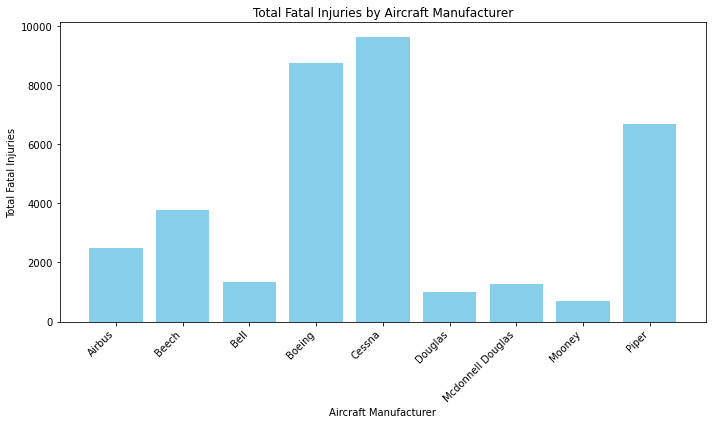

In [19]:
# Which aircraft make are top ten in terms of number of fatalities

# Create the DataFrame with the provided data
data = {'Row Labels': ['Airbus', 'Beech', 'Bell', 'Boeing', 'Cessna', 'Douglas', 'Mcdonnell Douglas', 'Mooney', 'Piper'],
    'Sum of Total.Fatal.Injuries': [2499, 3784, 1332, 8748, 9641, 984, 1286, 685, 6689]}
df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(df['Row Labels'], df['Sum of Total.Fatal.Injuries'], color='skyblue')
plt.xlabel('Aircraft Manufacturer')
plt.ylabel('Total Fatal Injuries')
plt.title('Total Fatal Injuries by Aircraft Manufacturer')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to fit labels
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

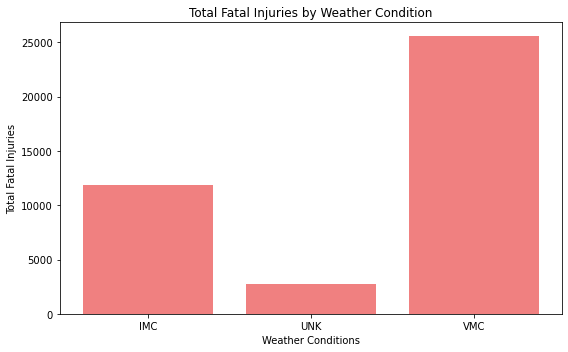

In [20]:
# To identify weather conditions that contribute to highest fatalities
data = {'Weather Conditions': ['IMC', 'UNK', 'VMC'],
    'Sum of Total.Fatal.Injuries': [11824, 2733, 25558]}

df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(8, 5))
plt.bar(df['Weather Conditions'], df['Sum of Total.Fatal.Injuries'], color='lightcoral')
plt.xlabel('Weather Conditions')
plt.ylabel('Total Fatal Injuries')
plt.title('Total Fatal Injuries by Weather Condition')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.tight_layout()  # Adjust layout to fit labels
plt.show